In [1]:
from igraph import *
import numpy as np
import pandas as pd
import collections
import copy
import matplotlib.pyplot as plt
import random
import copy
import openpyxl
import math
from IPython.display import Image, display
import networkx as nx

### Declaring Global Variables

In [2]:
# Global variables

no_of_vertices = 198
blrMatrixFile = 'wards_1km_3n.txt'
attributesFile = 'blrWardAttributes.xlsx'
logging = False

random.seed(10)
np.random.seed(10)

### Generate the graph of Bangalore Ward Network

In [3]:
g = Graph(directed=False)
g.add_vertices(no_of_vertices)

edges = []
with open(blrMatrixFile, 'r') as infile:
	for line in infile:
		line = line.split('\t')
		edges.append((int(line[0].strip())-1, int(line[1].strip())-1))

g.vs["label"] = range(no_of_vertices)
g.add_edges(edges)
g = g.simplify(multiple=True, loops=True, combine_edges=None)

In [4]:

df = pd.read_excel(attributesFile)
g.vs["area_name"] = df['WardName'].tolist()
g.vs["zip"]= df['WardNo'].tolist()
g.vs["lat"]= df['CentroidLatitude'].tolist()
g.vs["long"] = df['CentroidLongitude'].tolist() 
g.vs["population"]= df['totalPopulation'].tolist()

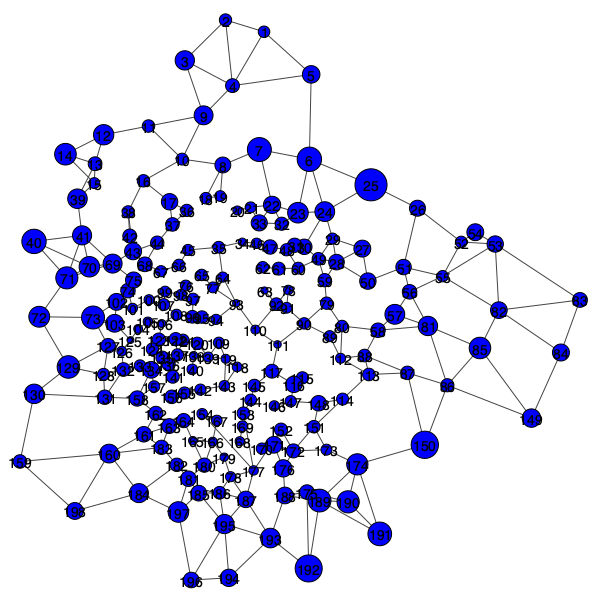

In [5]:

visual_style = {}
visual_style["vertex_size"] = [x*0.0003 for x in g.vs["population"]]
visual_style["vertex_label"] = g.vs["zip"]
visual_style["vertex_color"] = ["blue"]
layout = [(77.59971349,-13.11618839), (77.58042206,-13.12170949), (77.56003777,-13.10280487), (77.58392535,-13.09098666), (77.62331398,-13.0962503), (77.62241077,-13.05652483), (77.59737099,-13.0610706), (77.57908774,-13.05384562), (77.56945404,-13.07709234), (77.55869251,-13.05659512), (77.54186934,-13.07207984), (77.51940922,-13.0679967), (77.5151258,-13.05443643), (77.50027998,-13.05889249), (77.51473579,-13.04535804), (77.53933877,-13.04644359), (77.55242372,-13.03662834), (77.57057173,-13.03830506), (77.57779972,-13.03930127), (77.58636044,-13.03255505), (77.59301875,-13.03405451), (77.60374061,-13.03517443), (77.61669575,-13.03150909), (77.63012737,-13.03202015), (77.65327082,-13.0445612), (77.67653869,-13.0336132), (77.6489274,-13.01469889), (77.63599274,-13.00837367), (77.63401076,-13.01941672), (77.61986411,-13.01554357), (77.61501736,-13.01627308), (77.60856891,-13.02635051), (77.59730535,-13.02674284), (77.58881538,-13.01777498), (77.57702247,-13.0153492), (77.56103379,-13.03258927), (77.55385665,-13.02602902), (77.53170529,-13.0319048), (77.50630675,-13.03805041), (77.48454304,-13.01807585), (77.50861127,-13.02090181), (77.53247193,-13.02060281), (77.53414157,-13.01344988), (77.54624219,-13.01748039), (77.5616732,-13.01407352), (77.59597566,-13.01717153), (77.60275246,-13.01545313), (77.61097849,-13.0141601), (77.62697196,-13.00994591), (77.65170425,-12.99950171), (77.66956526,-13.0060633), (77.6984441,-13.01779839), (77.71545654,-13.01684713), (77.70549323,-13.02237569), (77.68912166,-13.00179736), (77.67258273,-12.9944744), (77.6652028,-12.9839497), (77.65679094,-12.97650365), (77.63008056,-12.99992104), (77.61686599,-13.00557706), (77.60705795,-13.00532759), (77.59907661,-13.00597597), (77.599931,-12.99510682), (77.5790602,-13.00137218), (77.56849127,-13.00238543), (77.55710905,-13.00704014), (77.54813049,-13.00412615), (77.54004259,-13.00734962), (77.52389999,-13.00768737), (77.51224925,-13.00619957), (77.50097528,-13.00100554), (77.4871586,-12.98280723), (77.51409036,-12.98245642), (77.53158365,-12.99504809), (77.53440781,-12.99998419), (77.56051368,-12.99743614), (77.57413814,-12.99655548), (77.61185579,-12.99534349), (77.63103942,-12.98917002), (77.63878312,-12.97845611), (77.68177006,-12.97849295), (77.71728284,-12.98590067), (77.75790879,-12.99068783), (77.74836478,-12.96607022), (77.70782369,-12.9681829), (77.69149532,-12.95074313), (77.67150158,-12.95653663), (77.65003287,-12.96465159), (77.63259389,-12.97372452), (77.61982216,-12.97970426), (77.61104043,-12.98701437), (77.60587288,-12.98870168), (77.58580472,-12.98913116), (77.57566501,-12.98156477), (77.56862747,-12.98266673), (77.56381673,-12.98278386), (77.56419467,-12.99109701), (77.55822111,-12.99309423), (77.55019253,-12.99459875), (77.54213001,-12.99080844), (77.53387067,-12.98679768), (77.52587897,-12.98977232), (77.52489787,-12.97974223), (77.53668241,-12.97711656), (77.54153548,-12.98049727), (77.54847528,-12.97965423), (77.54951998,-12.9885037), (77.55589097,-12.98376737), (77.57709795,-12.97068767), (77.59537196,-12.97679463), (77.60646428,-12.96986655), (77.63804046,-12.96336159), (77.65220472,-12.95577977), (77.6390468,-12.94426331), (77.61894113,-12.95420921), (77.61464432,-12.95115999), (77.60370511,-12.95732356), (77.58619263,-12.9593349), (77.58051061,-12.96313319), (77.56628714,-12.97035889), (77.55909702,-12.97179849), (77.55547943,-12.97231269), (77.54704402,-12.97209255), (77.54381199,-12.96766912), (77.53284379,-12.97188923), (77.52846445,-12.96671052), (77.52164056,-12.96923919), (77.51936608,-12.95584286), (77.50178802,-12.95930569), (77.48461815,-12.94671618), (77.51996078,-12.94514094), (77.52930918,-12.95811174), (77.5376147,-12.95994907), (77.54322131,-12.95797605), (77.54881212,-12.96370264), (77.55194135,-12.96054477), (77.55637793,-12.96498829), (77.56444799,-12.96457922), (77.57180057,-12.96396818), (77.56377583,-12.95818405), (77.55402732,-12.95471708), (77.56787444,-12.94869146), (77.57988306,-12.95048638), (77.5930164,-12.94384464), (77.59487406,-12.95059575), (77.6048043,-12.94110888), (77.61307905,-12.94323901), (77.62703369,-12.94231583), (77.73361364,-12.93537339), (77.68020858,-12.92287414), (77.62464935,-12.93134046), (77.60821471,-12.92997135), (77.58941967,-12.93763367), (77.56873334,-12.93737537), (77.55988385,-12.9471214), (77.55349423,-12.94532752), (77.54465605,-12.95015924), (77.5362326,-12.9445404), (77.47752764,-12.91506851), (77.5221415,-12.91875728), (77.53950587,-12.92779695), (77.54557547,-12.93762398), (77.55222334,-12.93164147), (77.55947631,-12.93420056), (77.56404589,-12.92480316), (77.57401692,-12.92435249), (77.57608046,-12.93425178), (77.58754536,-12.92454509), (77.58894051,-12.93159793), (77.59863972,-12.92110622), (77.60461518,-12.92286645), (77.61441843,-12.92001822), (77.6309887,-12.92059102), (77.64642571,-12.91371783), (77.62121181,-12.90074116), (77.60934528,-12.91183769), (77.59450672,-12.91088178), (77.58294966,-12.9079402), (77.57977474,-12.91708818), (77.56983239,-12.91335147), (77.56185771,-12.90699024), (77.55605714,-12.91350138), (77.54840741,-12.9216848), (77.53708088,-12.90026447), (77.56701395,-12.9002286), (77.57748796,-12.90042094), (77.59060305,-12.89731773), (77.61015904,-12.8991566), (77.6275172,-12.89676891), (77.64182312,-12.89616673), (77.65765529,-12.88116606), (77.62206978,-12.86499963), (77.60288371,-12.87921982), (77.5821325,-12.86059112), (77.57990154,-12.88577479), (77.56328568,-12.85958775), (77.55684606,-12.89142187), (77.50501305,-12.89190332)]
out = plot(g, layout=layout, **visual_style)
out.save('BLRWardGraph.png')
display(Image(filename='BLRWardGraph.png'))

### Degree Centrality

Node 188, ZIP: 189 has max degree centrality with value 0.009316770186335404.


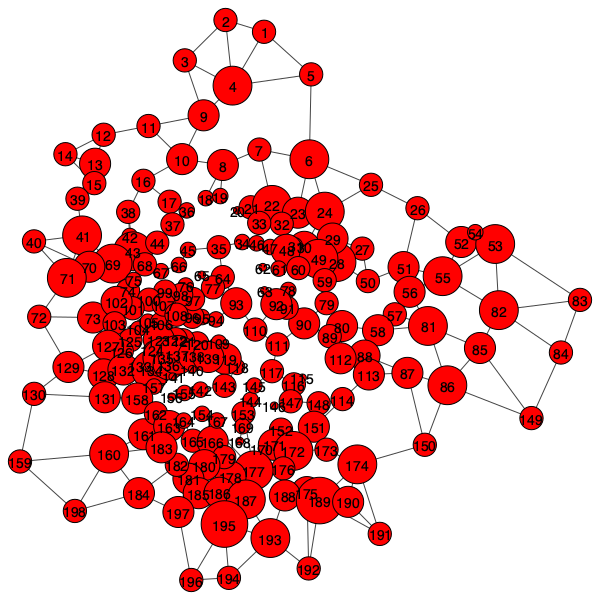

Top 10 degree_centrality
195 Konankunte 0.009316770186335404
189 Hongasandra 0.009316770186335404
174 HSR Layout 0.007763975155279503
137 Rayapuram 0.007763975155279503
135 Padarayanapura 0.007763975155279503
134 Bapuji Nagar 0.007763975155279503
41 Peenya Industrial Area 0.007763975155279503
82 Garudachar Playa 0.007763975155279503
172 Madivala 0.007763975155279503
28 Kammanahalli 0.007763975155279503


In [6]:
# Degree Centrality
degree_list = Graph.degree(g)
sum_of_degrees = np.sum(degree_list)
g.vs["degree"] = [degree_list[x] for x in range(0,len(degree_list))]
g.vs["degree_centrality"] = [degree_list[x] / sum_of_degrees for x in range(0,len(degree_list))]
print("Node {0}, ZIP: {1} has max degree centrality with value {2}.".format(np.argmax(g.vs["degree_centrality"]), g.vs[np.argmax(g.vs["degree_centrality"])]["zip"] ,np.max(g.vs["degree_centrality"])))
visual_style = {}
visual_style["vertex_size"] = [x*5000 for x in g.vs["degree_centrality"]]
visual_style["vertex_label"] = g.vs["zip"]
out = plot(g, layout=layout, **visual_style)
out.save('BLRGraph_degree.png')
display(Image(filename='BLRGraph_degree.png'))
t10 = np.argsort(g.vs["degree_centrality"])[::-1][:10]
print("Top 10 degree_centrality")
for t in t10:
    print(g.vs[t]["zip"],g.vs[t]["area_name"],g.vs[t]["degree_centrality"])

### Closeness Centrality

Node 110, ZIP: 111 has max closeness centrality with value 0.12685125563425628.


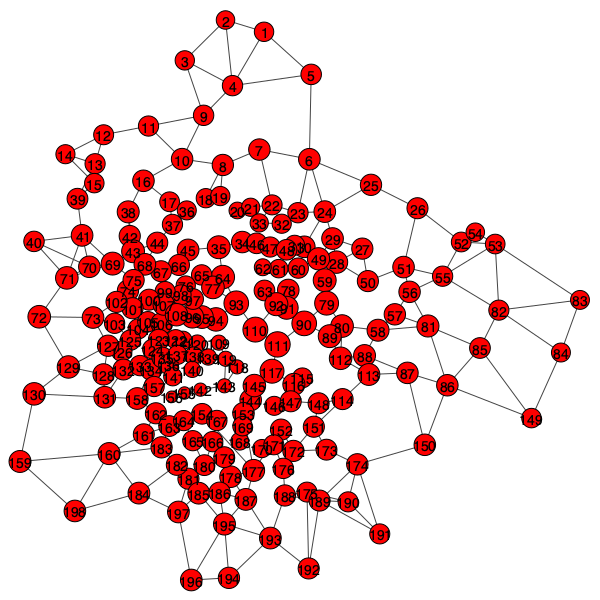

Top 10 closeness_centrality
111 Shantala Nagar 0.12685125563425628
110 Sampangiram Nagar 0.12468354430379747
90 Halsoor 0.12335629304946776
93 Vasanth Nagar 0.123279098873592
117 Shanthi Nagar 0.11997563946406821
79 Sarvagna Nagar 0.11953883495145631
64 Rajamahal Guttahalli 0.1177525403466826
94 Gandhinagar 0.1175417661097852
92 Shivaji Nagar 0.1155425219941349
91 Bharathi Nagar 0.11513734658094682


In [7]:
# Closeness Centrality
g.vs["closeness_centrality"] = g.closeness()
print("Node {0}, ZIP: {1} has max closeness centrality with value {2}.".format(np.argmax(g.vs["closeness_centrality"]), g.vs[np.argmax(g.vs["closeness_centrality"])]["zip"] ,np.max(g.vs["closeness_centrality"])))
visual_style = {}
visual_style["vertex_size"] = [x*200 for x in g.vs["closeness_centrality"]]
visual_style["vertex_label"] = g.vs["zip"]
out = plot(g, layout=layout, **visual_style)
out.save('BLRGraph_closeness.png')
display(Image(filename='BLRGraph_closeness.png'))
t10 = np.argsort(g.vs["closeness_centrality"])[::-1][:10]
print("Top 10 closeness_centrality")
for t in t10:
    print(g.vs[t]["zip"],g.vs[t]["area_name"],g.vs[t]["closeness_centrality"])

### Betweenness Centrality

Node 110, ZIP: 111 has max betweenness centrality with value 3861.052633560358.


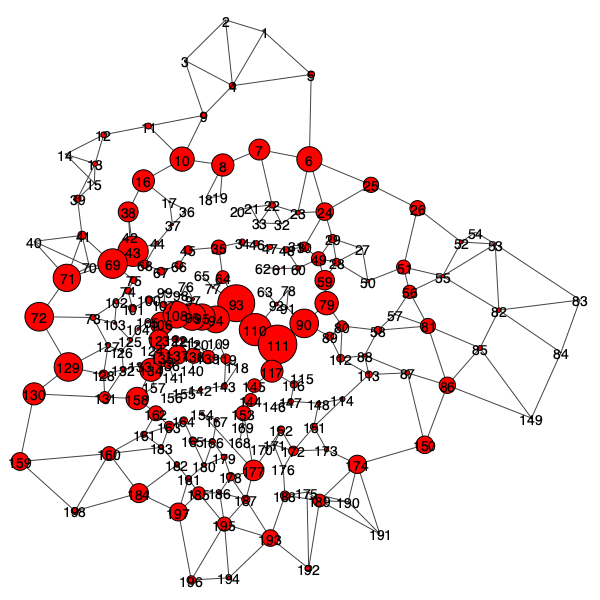

Top 10 betweenness_centrality
111 Shantala Nagar 3861.052633560358
93 Vasanth Nagar 3687.8200804568173
110 Sampangiram Nagar 3214.5166002768665
43 Nandini Layout 3027.0364162071555
69 Laggere 2953.81660157734
72 Herohalli 2865.5623993406784
90 Halsoor 2864.870974653858
129 Jnana Bharathi ward 2857.788406140514
71 Hegganahalli 2736.4674864358544
96 Okalipuram 2714.3812037228604


In [8]:
# Betweenness Centrality
g.vs["betweenness_centrality"] = g.betweenness()
print("Node {0}, ZIP: {1} has max betweenness centrality with value {2}.".format(np.argmax(g.vs["betweenness_centrality"]), g.vs[np.argmax(g.vs["betweenness_centrality"])]["zip"] ,np.max(g.vs["betweenness_centrality"])))
visual_style = {}
visual_style["vertex_size"] = [x*0.01 for x in g.vs["betweenness_centrality"]]
visual_style["vertex_label"] = g.vs["zip"]
# visual_style["vertex_color"] = "green"
out = plot(g, layout=layout, **visual_style)
out.save('BLRGraph_betweenness.png')
display(Image(filename='BLRGraph_betweenness.png'))
t10 = np.argsort(g.vs["betweenness_centrality"])[::-1][:10]
print("Top 10 betweenness_centrality")
for t in t10:
    print(g.vs[t]["zip"],g.vs[t]["area_name"],g.vs[t]["betweenness_centrality"])

### Closeness Vitality

[2025.0, 2127.0, 2034.0, 1593.0, 778.0, -2740.0, -857.0, -inf, 793.0, -3551.0, 645.0, 1002.0, 1735.0, 2059.0, 2020.0, -1697.0, 1688.0, 2040.0, 2040.0, 2354.0, -inf, 1021.0, 1546.0, -1251.0, -718.0, -589.0, 1856.0, 1420.0, 1650.0, 1256.0, 1964.0, 2053.0, 2158.0, 631.0, -2621.0, 2068.0, 1770.0, -230.0, 254.0, 1924.0, -477.0, 1856.0, -4354.0, 1433.0, -537.0, 1026.0, 1053.0, 709.0, 637.0, 1588.0, 681.0, 1723.0, 1879.0, 2126.0, 1871.0, 789.0, 1840.0, 1247.0, -1613.0, -inf, -inf, 2327.0, 1901.0, -1639.0, 1931.0, -216.0, -255.0, -654.0, -4727.0, 1827.0, -3414.0, -3508.0, 1385.0, 1065.0, 963.0, 2043.0, -inf, 1826.0, -1936.0, 1092.0, 782.0, 1776.0, 2082.0, 2076.0, 1626.0, -620.0, 1639.0, 1769.0, 1381.0, -4458.0, 1442.0, -inf, -14723.0, -9674.0, -9203.0, -9280.0, 1434.0, 1842.0, 1668.0, 358.0, 200.0, 1449.0, 1767.0, 1701.0, 1511.0, -6136.0, 1229.0, -6893.0, 2604.0, -10150.0, -5934.0, 1219.0, 1208.0, 1389.0, 1980.0, -inf, -3709.0, 2791.0, -inf, 2327.0, 2074.0, 1884.0, -4436.0, 2001.0, 1494.0, 177

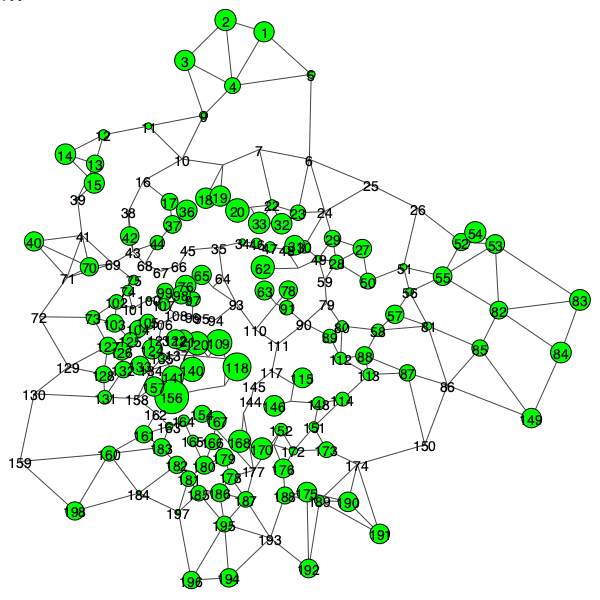

Top 10 closeness_vitality
156 Srinagar 3370.0
118 Sudham Nagara 2791.0
109 Chickpete 2604.0
140 Chamrajapet 2430.0
20 Ganga Nagar 2354.0
120 Cottonpete 2327.0
62 Ramaswamy Palya 2327.0
168 Pattabhiram Nagar 2215.0
141 Azad Nagar 2160.0
170 Jayanagar East 2160.0


In [9]:
# Closeness Vitality
def my_closeness_vitality(g):
    gnx = g.to_networkx()
    cv = nx.closeness_vitality(gnx)
    l = []
    for i in range(no_of_vertices):
        l.append(cv[i])
    print(l)
    return l

g.vs["closeness_vitality"] = my_closeness_vitality(g)
print("Node {0}, ZIP: {1} has max closeness vitality with value {2}.".format(np.argmax(g.vs["closeness_vitality"]), g.vs[np.argmax(g.vs["closeness_vitality"])]["zip"] ,np.max(g.vs["closeness_vitality"])))
visual_style = {}
visual_style["vertex_size"] = [x*0.01 for x in g.vs["closeness_vitality"]]
visual_style["vertex_label"] = g.vs["zip"]
visual_style["vertex_color"] = ["green"]
out = plot(g, layout=layout, **visual_style)
out.save('BLRGraph_closenessVitality.png')
display(Image(filename='BLRGraph_closenessVitality.png'))
t10 = np.argsort(g.vs["closeness_vitality"])[::-1][:10]
print("Top 10 closeness_vitality")
for t in t10:
    print(g.vs[t]["zip"],g.vs[t]["area_name"],g.vs[t]["closeness_vitality"])

### Most congested and polluted areas

True


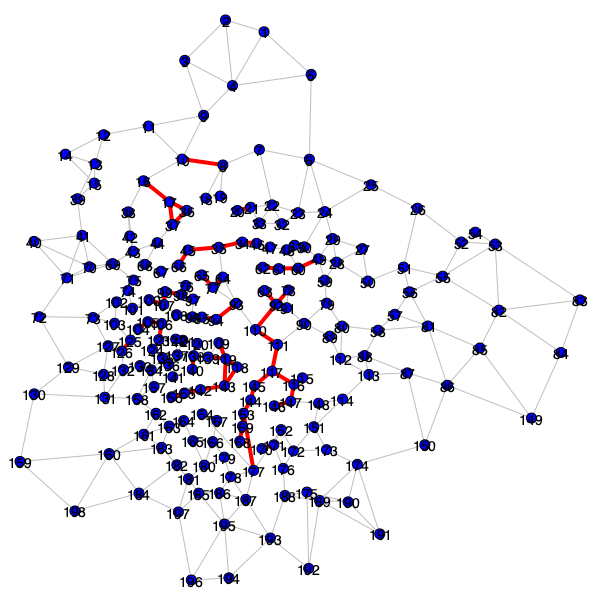

In [10]:
el = g.get_edge_dataframe()
eln = el.to_numpy()
countDict = {}
for i in range(len(eln)):
    countDict[eln[i][0],eln[i][1]] = 0
print(len(countDict)==len(eln))

num_randomWalks = 10000
minSteps = 5
maxSteps = 20
maxNumEdges = 50

for i in range(num_randomWalks):
    sn = random.randint(0, no_of_vertices - 1)
    numSteps = random.randint(minSteps, maxSteps)
    w = g.random_walk(start=sn, steps=numSteps)
    # print(w)
    for j in range(len(w)-1):
        if (w[j],w[j+1]) in countDict:
            # print("1")
            countDict[(w[j],w[j+1])] = countDict[(w[j],w[j+1])] + 1
        elif (w[j+1],w[j]) in countDict:
            # print("2")
            countDict[(w[j+1],w[j])] = countDict[(w[j+1],w[j])] + 1
        else:
            print(w[j],w[j+1])
            continue

sortedDict = sorted(countDict.items(), key=lambda x: x[1], reverse=True)    

maxEdgeList = []
for i in sortedDict[0:maxNumEdges]:
    maxEdgeList.append(i[0])

visual_style = {}
# visual_style["vertex_size"] = [x*0.0003 for x in g.vs["population"]]
visual_style["vertex_size"] = [10]
visual_style["vertex_label"] = g.vs["zip"]
visual_style["vertex_color"] = ["blue"]
visual_style["edge_color"] = ["red" if (edge.source,edge.target) in maxEdgeList else "gray" for edge in g.es]
visual_style["edge_width"] = [4 if (edge.source,edge.target) in maxEdgeList else 1 for edge in g.es]
layout = [(77.59971349,-13.11618839), (77.58042206,-13.12170949), (77.56003777,-13.10280487), (77.58392535,-13.09098666), (77.62331398,-13.0962503), (77.62241077,-13.05652483), (77.59737099,-13.0610706), (77.57908774,-13.05384562), (77.56945404,-13.07709234), (77.55869251,-13.05659512), (77.54186934,-13.07207984), (77.51940922,-13.0679967), (77.5151258,-13.05443643), (77.50027998,-13.05889249), (77.51473579,-13.04535804), (77.53933877,-13.04644359), (77.55242372,-13.03662834), (77.57057173,-13.03830506), (77.57779972,-13.03930127), (77.58636044,-13.03255505), (77.59301875,-13.03405451), (77.60374061,-13.03517443), (77.61669575,-13.03150909), (77.63012737,-13.03202015), (77.65327082,-13.0445612), (77.67653869,-13.0336132), (77.6489274,-13.01469889), (77.63599274,-13.00837367), (77.63401076,-13.01941672), (77.61986411,-13.01554357), (77.61501736,-13.01627308), (77.60856891,-13.02635051), (77.59730535,-13.02674284), (77.58881538,-13.01777498), (77.57702247,-13.0153492), (77.56103379,-13.03258927), (77.55385665,-13.02602902), (77.53170529,-13.0319048), (77.50630675,-13.03805041), (77.48454304,-13.01807585), (77.50861127,-13.02090181), (77.53247193,-13.02060281), (77.53414157,-13.01344988), (77.54624219,-13.01748039), (77.5616732,-13.01407352), (77.59597566,-13.01717153), (77.60275246,-13.01545313), (77.61097849,-13.0141601), (77.62697196,-13.00994591), (77.65170425,-12.99950171), (77.66956526,-13.0060633), (77.6984441,-13.01779839), (77.71545654,-13.01684713), (77.70549323,-13.02237569), (77.68912166,-13.00179736), (77.67258273,-12.9944744), (77.6652028,-12.9839497), (77.65679094,-12.97650365), (77.63008056,-12.99992104), (77.61686599,-13.00557706), (77.60705795,-13.00532759), (77.59907661,-13.00597597), (77.599931,-12.99510682), (77.5790602,-13.00137218), (77.56849127,-13.00238543), (77.55710905,-13.00704014), (77.54813049,-13.00412615), (77.54004259,-13.00734962), (77.52389999,-13.00768737), (77.51224925,-13.00619957), (77.50097528,-13.00100554), (77.4871586,-12.98280723), (77.51409036,-12.98245642), (77.53158365,-12.99504809), (77.53440781,-12.99998419), (77.56051368,-12.99743614), (77.57413814,-12.99655548), (77.61185579,-12.99534349), (77.63103942,-12.98917002), (77.63878312,-12.97845611), (77.68177006,-12.97849295), (77.71728284,-12.98590067), (77.75790879,-12.99068783), (77.74836478,-12.96607022), (77.70782369,-12.9681829), (77.69149532,-12.95074313), (77.67150158,-12.95653663), (77.65003287,-12.96465159), (77.63259389,-12.97372452), (77.61982216,-12.97970426), (77.61104043,-12.98701437), (77.60587288,-12.98870168), (77.58580472,-12.98913116), (77.57566501,-12.98156477), (77.56862747,-12.98266673), (77.56381673,-12.98278386), (77.56419467,-12.99109701), (77.55822111,-12.99309423), (77.55019253,-12.99459875), (77.54213001,-12.99080844), (77.53387067,-12.98679768), (77.52587897,-12.98977232), (77.52489787,-12.97974223), (77.53668241,-12.97711656), (77.54153548,-12.98049727), (77.54847528,-12.97965423), (77.54951998,-12.9885037), (77.55589097,-12.98376737), (77.57709795,-12.97068767), (77.59537196,-12.97679463), (77.60646428,-12.96986655), (77.63804046,-12.96336159), (77.65220472,-12.95577977), (77.6390468,-12.94426331), (77.61894113,-12.95420921), (77.61464432,-12.95115999), (77.60370511,-12.95732356), (77.58619263,-12.9593349), (77.58051061,-12.96313319), (77.56628714,-12.97035889), (77.55909702,-12.97179849), (77.55547943,-12.97231269), (77.54704402,-12.97209255), (77.54381199,-12.96766912), (77.53284379,-12.97188923), (77.52846445,-12.96671052), (77.52164056,-12.96923919), (77.51936608,-12.95584286), (77.50178802,-12.95930569), (77.48461815,-12.94671618), (77.51996078,-12.94514094), (77.52930918,-12.95811174), (77.5376147,-12.95994907), (77.54322131,-12.95797605), (77.54881212,-12.96370264), (77.55194135,-12.96054477), (77.55637793,-12.96498829), (77.56444799,-12.96457922), (77.57180057,-12.96396818), (77.56377583,-12.95818405), (77.55402732,-12.95471708), (77.56787444,-12.94869146), (77.57988306,-12.95048638), (77.5930164,-12.94384464), (77.59487406,-12.95059575), (77.6048043,-12.94110888), (77.61307905,-12.94323901), (77.62703369,-12.94231583), (77.73361364,-12.93537339), (77.68020858,-12.92287414), (77.62464935,-12.93134046), (77.60821471,-12.92997135), (77.58941967,-12.93763367), (77.56873334,-12.93737537), (77.55988385,-12.9471214), (77.55349423,-12.94532752), (77.54465605,-12.95015924), (77.5362326,-12.9445404), (77.47752764,-12.91506851), (77.5221415,-12.91875728), (77.53950587,-12.92779695), (77.54557547,-12.93762398), (77.55222334,-12.93164147), (77.55947631,-12.93420056), (77.56404589,-12.92480316), (77.57401692,-12.92435249), (77.57608046,-12.93425178), (77.58754536,-12.92454509), (77.58894051,-12.93159793), (77.59863972,-12.92110622), (77.60461518,-12.92286645), (77.61441843,-12.92001822), (77.6309887,-12.92059102), (77.64642571,-12.91371783), (77.62121181,-12.90074116), (77.60934528,-12.91183769), (77.59450672,-12.91088178), (77.58294966,-12.9079402), (77.57977474,-12.91708818), (77.56983239,-12.91335147), (77.56185771,-12.90699024), (77.55605714,-12.91350138), (77.54840741,-12.9216848), (77.53708088,-12.90026447), (77.56701395,-12.9002286), (77.57748796,-12.90042094), (77.59060305,-12.89731773), (77.61015904,-12.8991566), (77.6275172,-12.89676891), (77.64182312,-12.89616673), (77.65765529,-12.88116606), (77.62206978,-12.86499963), (77.60288371,-12.87921982), (77.5821325,-12.86059112), (77.57990154,-12.88577479), (77.56328568,-12.85958775), (77.55684606,-12.89142187), (77.50501305,-12.89190332)]
out = plot(g, layout=layout, **visual_style)
out.save('BLRGraph_maxEdges.png')
display(Image(filename='BLRGraph_maxEdges.png'))